## Importing necessary packages

In [251]:
import sys
import csv
import math
import numpy as np
import pandas as pd
# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#To preprocess
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler , OneHotEncoder , QuantileTransformer ,PowerTransformer
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import norm, skew 

# Import Iterative Imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from operator import itemgetter
import time

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale

#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

## Loading the dataset

In [252]:
# Training Dataset 
df_train = pd.read_csv('train.csv')
#Testting Dataset
df_test = pd.read_csv('test.csv')
#Submission 
#df_submission = pd.read_csv('sample_submission.csv')

## Exploring the dataset

In [253]:
df_train.shape

(1460, 81)

In [254]:
df_test.shape

(1459, 80)

In [255]:
df_train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [256]:
train_null = df_train.isnull().sum().sum()
print(f'Null Count in Train: {train_null}')

Null Count in Train: 7829


In [257]:
train_duplicates = df_train.duplicated().sum()
print(f"Number of duplicate rows in train_data: {train_duplicates}")

Number of duplicate rows in train_data: 0


#### No duplicates in the data

In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

/var/folders/3r/s1c1b1q170z863l2655cr3nm0000gn/T/ipykernel_10995/3487934921.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/3r/s1c1b1q170z863l2655cr3nm0000gn/T/ipykernel_10995/3487934921.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




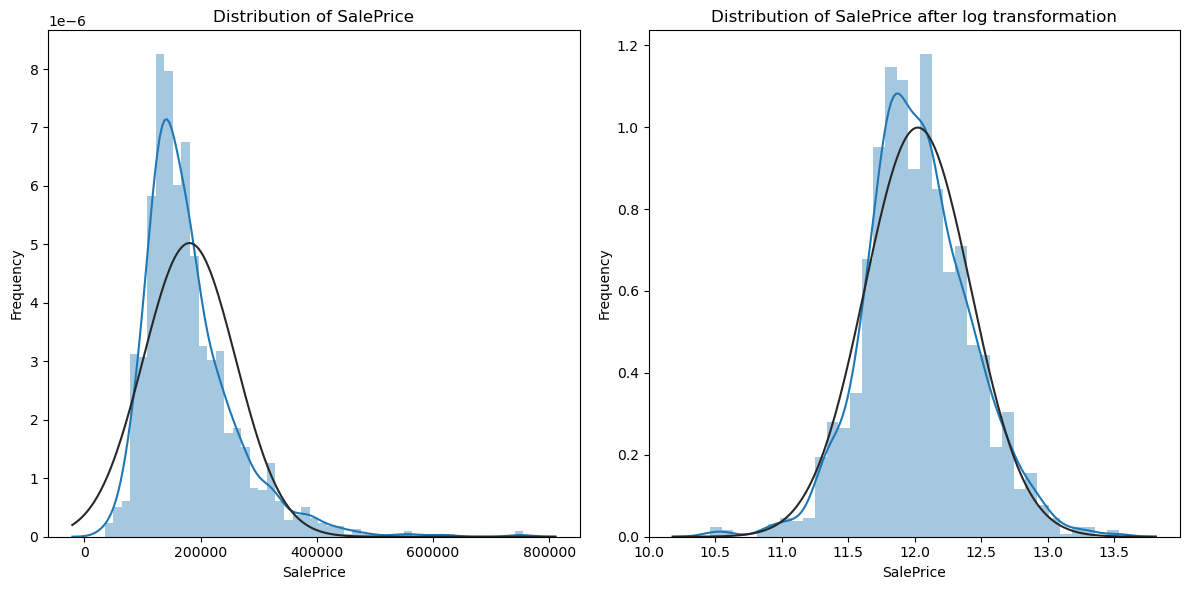

In [259]:


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution plot
sns.distplot(df_train['SalePrice'], fit=stats.norm, ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SalePrice')


sns.distplot(np.log1p(df_train["SalePrice"]), fit=stats.norm, ax=axes[1])
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SalePrice after log transformation')

# Adjust layout
plt.tight_layout()

plt.show()

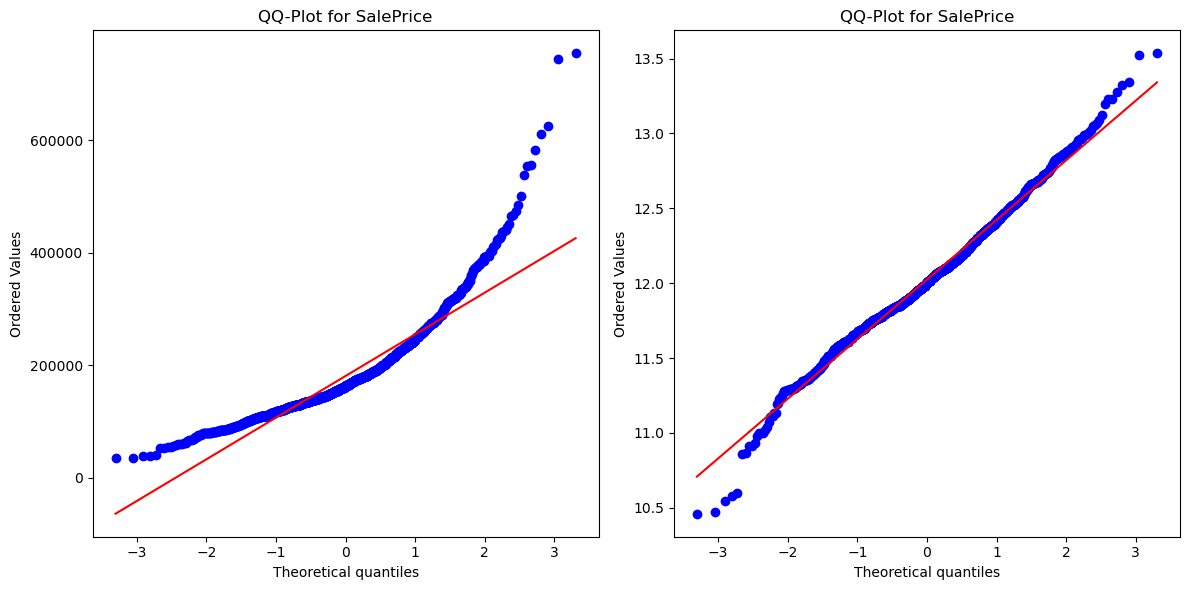

In [260]:
#Normalizing target variable


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


stats.probplot(df_train['SalePrice'], plot=axes[0])
axes[0].set_title('QQ-Plot for SalePrice')

# Plot the QQ-plot
stats.probplot(np.log1p(df_train["SalePrice"]), plot=axes[1])
axes[1].set_title('QQ-Plot for SalePrice')

# Adjust layout
plt.tight_layout()

plt.show()

In [261]:
data = df_train


In [262]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


Text(0.5, 1.0, 'Percent of Missing Data by Feature')

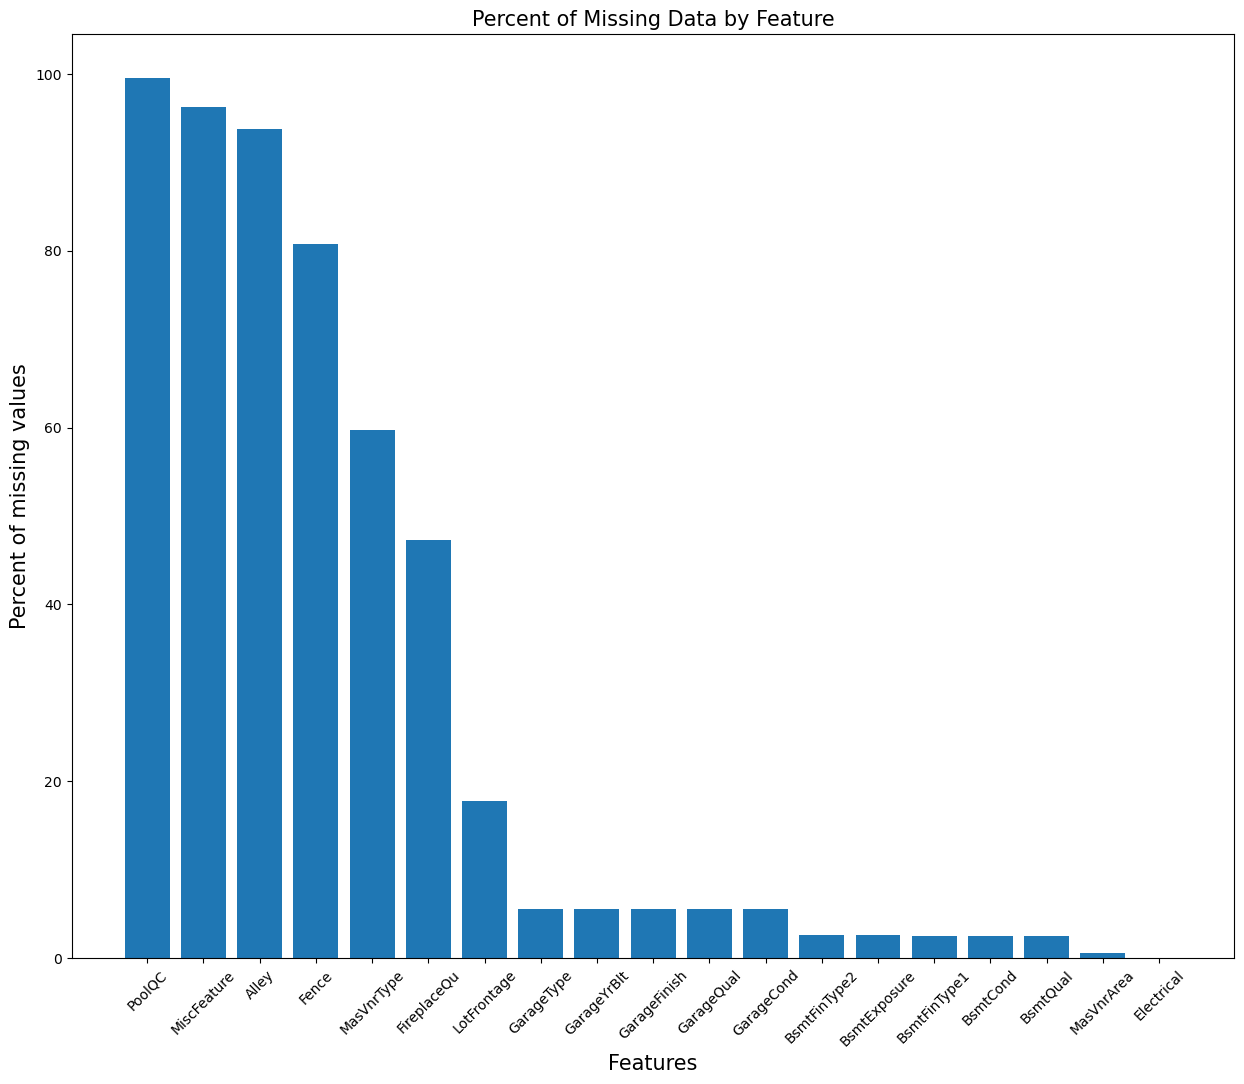

In [263]:
plt.figure(figsize=(15, 12))
plt.bar(all_data_na.index, all_data_na)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent of Missing Data by Feature', fontsize=15)

#### The features PoolQC, MiscFeature, Alley, Fence, MasVnrType and FireplaceQu are having more number of duplicates.  

In [264]:
# Printing Columns are categorical.
object_columns = data.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n \n : {object_columns}')
object_columns.value_counts().sum()

The Following Columns Have Dtype as Object 
 
 : Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


43

In [265]:
# Printing Columns That are numerical
float_columns = data.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n\n{float_columns}')
float_columns.value_counts().sum()

The Following Columns Have Dtype as Float and int :

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


38

In [266]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['OverallQual'] = data['OverallQual'].astype(str)



In [267]:
# Printing Columns are categorical.
object_columns = data.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n \n : {object_columns}')
object_columns.value_counts().sum()

The Following Columns Have Dtype as Object 
 
 : Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


46



**Descriptive statistics for training data involve summarizing and analyzing key characteristics of the dataset. The df.describe() function in pandas provides valuable insights by calculating various statistical measures for each numerical column in the DataFrame**
    
- **Count:** Number of non-null values.
- **Mean:** Average value.
- **Std (Standard Deviation):** Measure of the amount of variation or dispersion.
- **Min:** Minimum value.
- **25% (First Quartile):** Value below which 25% of the data falls.
- **50% (Median or Second Quartile):** Middle value of the dataset.
- **75% (Third Quartile):** Value below which 75% of the data falls.
- **Max:** Maximum value.

Through `df.describe()`, you can quickly grasp the central tendency, dispersion, and distribution of the numerical features in your training dataset. This information is crucial for identifying outliers, understanding data distributions, and making informed decisions during the data preprocessing and modeling stages.


In [268]:
# Describe 
data.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling null values

#### Setting None to null values for the features - PoolQC, MiscFeature, Alley, Fence, MasVnrType and FireplaceQu are having more number of duplicates.

In [269]:


higly_miss_cols = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
for col in higly_miss_cols:
    data[col].fillna('None',inplace=True)

In [270]:
#Checking whether none is set
missing_percentage = ((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

# Filter to include only percentages above zero
missing_percentage_above_zero = missing_percentage[missing_percentage > 0]

# Display the filtered percentages
print(missing_percentage_above_zero)


LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


#### Handling missing values for other columns

In [271]:
# List of numerical columns with missing values between 0 and the threshold

total_entries = len(data)
numerical_cols = [col for col in data.columns
                  if (data[col].dtype in ['int64', 'float64']) and 
                     (0 < data[col].isnull().sum() / total_entries * 100 < 20)]
# Print the numerical columns meeting the condition
print(f'Numerical Feature Of Training data below Threshold : \n{numerical_cols}')
print('----------------------------------------------------------------------')
# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col for col in data.columns 
                   if (data[col].dtype == 'object') and 
                        (0 < data[col].isnull().sum() / total_entries * 100 < 20)]
print(f'Categorical Feature Of Training data below Threshold : \n{categorical_cols}')

Numerical Feature Of Training data below Threshold : 
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
----------------------------------------------------------------------
Categorical Feature Of Training data below Threshold : 
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


#### Iterative imputer and simple imputer.. Search for paper. maybe usefull for reference
#### LotFrontage - Area from 

In [272]:
# Lets Define a Function for Imputing Missing Values Of Categorical Features 
def simple_imputer(data , columns):
    # Initialize SimpleImputer with the specified strategy and fill_value
    imputer = SimpleImputer(strategy='most_frequent')
    # Fit the imputer on the DataFrame and transform the DataFrame
    #ravel() is used to convert the 2D array-like output of fit_transform into a 1D array for easier assignment to DataFrame columns.
    for col in columns:
        data[col] = imputer.fit_transform(data[[col]]).ravel()
    return data

# Lets Define a Function for Imputing Missing Values Of Numerical Features 
def iterative_imputer(data , columns):
    #Imputer
    imputer = IterativeImputer(max_iter=10, random_state=42)
    # fit_transform
    for col in columns:
        data[col] = imputer.fit_transform(data[[col]])
    return data

In [273]:
data = iterative_imputer(data=data,columns=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
data = simple_imputer(data=data,columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

data.isnull().sum().sum()

0

In [274]:
#Calculating total Square foot
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']




# EDA

#### Distrbituion of target variable

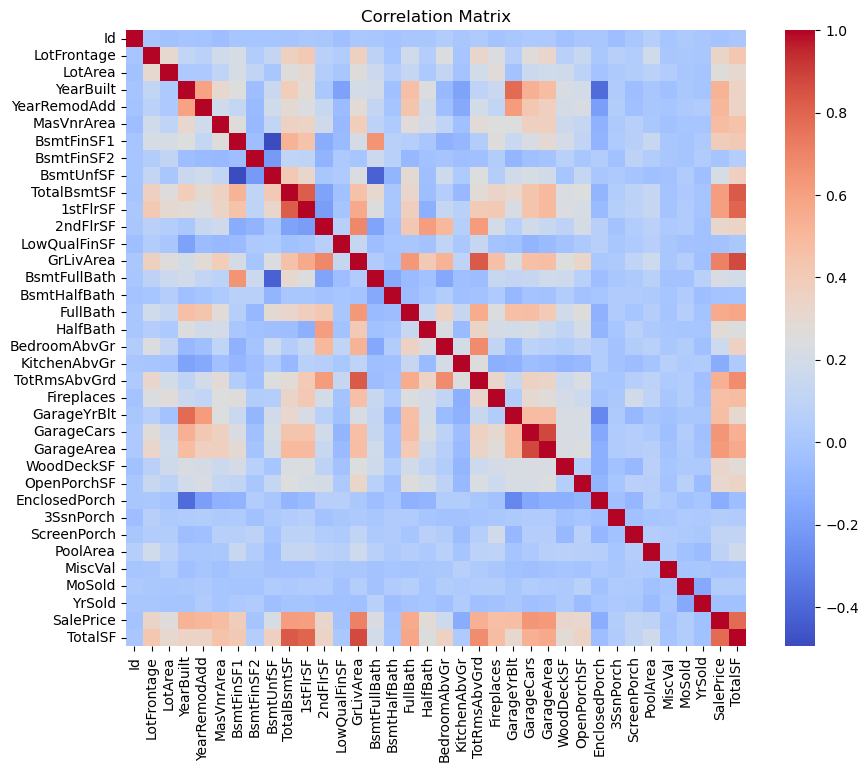

In [275]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [276]:
cor_sorted = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Select only high correlations (absolute correlation > 0.5)
CorHigh = cor_sorted[abs(cor_sorted) > 0.5]

# Display feature names along with their correlation values
for feature, correlation in CorHigh.items():
    print(f"{feature}: {correlation:.2f}")
    


SalePrice: 1.00
TotalSF: 0.78
GrLivArea: 0.71
GarageCars: 0.64
GarageArea: 0.62
TotalBsmtSF: 0.61
1stFlrSF: 0.61
FullBath: 0.56
TotRmsAbvGrd: 0.53
YearBuilt: 0.52
YearRemodAdd: 0.51


In [277]:
# From this we could see the highly correlated numerical features are TotalSF, GrLiveArea, GarageCars, Yearbuilt, YearRemodAdd, TotRmsAbvGrd

In [278]:
def remove_outliers_zscore(df, columns, threshold=4):
    for col in columns:
        # Calculate the mean and standard deviation
        mean = df[col].mean()
        std_dev = df[col].std()
        
        # Calculate the Z-score for each value in the column
        z_scores = (df[col] - mean) / std_dev
        
        # Filter the DataFrame to show outlier values and calculate the sum
        outliers_sum = df.loc[abs(z_scores) > threshold, col].value_counts().sum()
        print(f"Total number of outliers detected and Deleted are : {outliers_sum}")
        
        # Remove outliers from the dataset
        df_clean = df.loc[abs(z_scores) <= threshold].copy()
    
    return df_clean

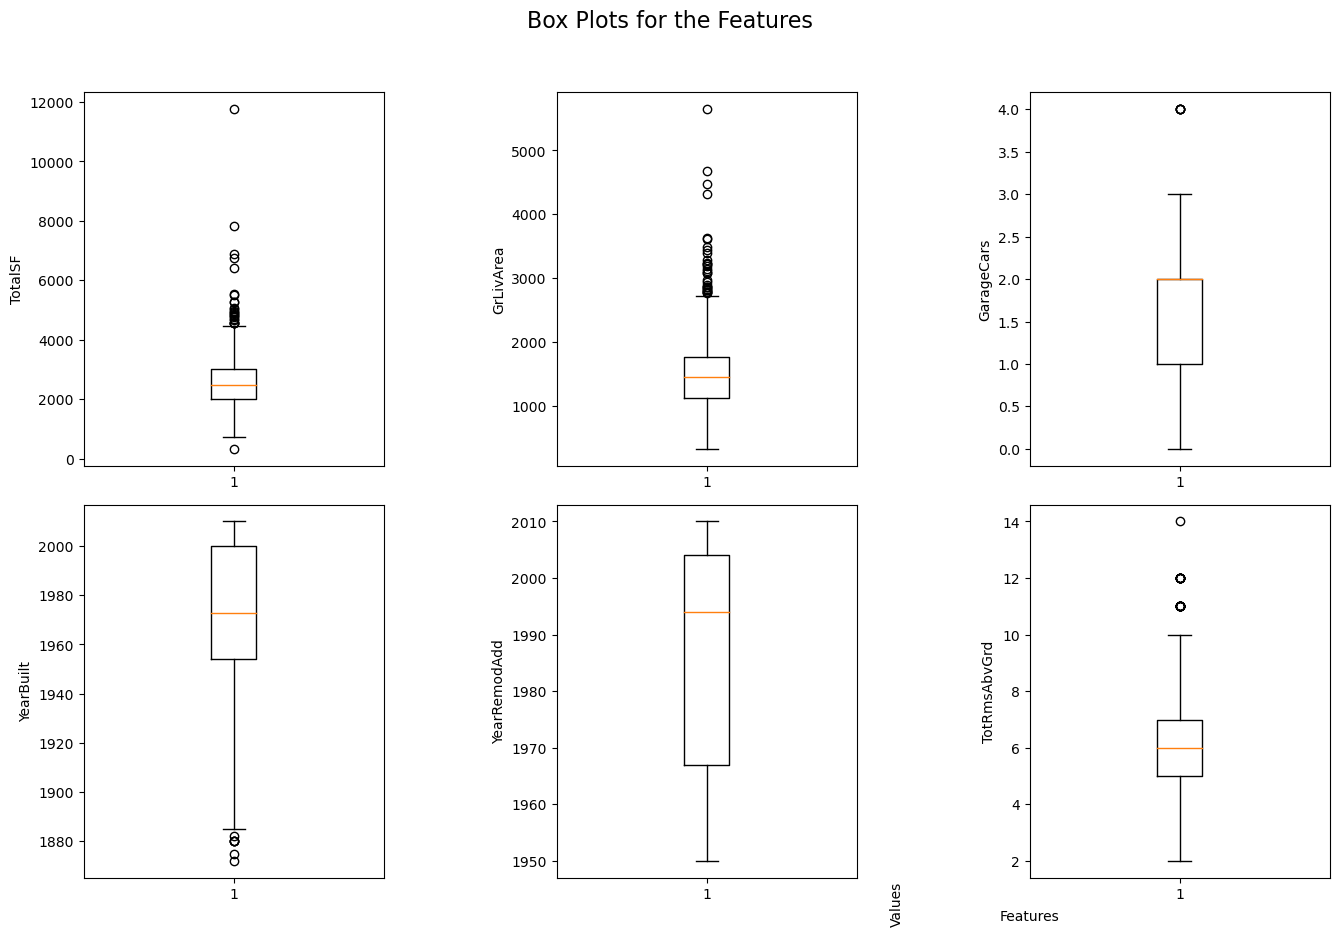

In [279]:
features = ["TotalSF", "GrLivArea", "GarageCars", "YearBuilt", "YearRemodAdd", "TotRmsAbvGrd"]

# Calculate the number of rows and columns needed for the subplots
num_plots = len(features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to make it easier to index
axes = axes.flatten()

# Loop through each feature and create a box plot
for i, feature in enumerate(features):
    # Create the box plot using Plotly Express
    fig = px.box(data, y=feature)
    fig.update_layout(showlegend=False)  # Hide the legend for each plot
    box_data = fig['data'][0]  # Extract the box plot data
    box_values = box_data['y']  # Extract the y-values (box plot values)
    axes[i].boxplot(box_values)  # Plot the box plot on the corresponding subplot
    axes[i].set_ylabel(feature)  # Set y-label for each subplot

# Remove empty subplots if the number of features is not a multiple of the number of columns
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Set common x-label and title
plt.text(0.5, 0.04, 'Features', ha='center', va='center')
plt.text(0.06, 0.5, 'Values', ha='center', va='center', rotation='vertical')
plt.suptitle('Box Plots for the Features', fontsize=16)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust layout to prevent overlap
plt.show()

In [280]:
dataClean = data

In [281]:
dataClean = remove_outliers_zscore(dataClean, ['TotalSF'])
dataClean = remove_outliers_zscore(dataClean, ['GrLivArea'])
dataClean = remove_outliers_zscore(dataClean, ['GarageCars'])
dataClean = remove_outliers_zscore(dataClean, ['YearBuilt'])
dataClean = remove_outliers_zscore(dataClean, ['YearRemodAdd'])
dataClean = remove_outliers_zscore(dataClean, ['TotRmsAbvGrd'])

Total number of outliers detected and Deleted are : 5
Total number of outliers detected and Deleted are : 3
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 1


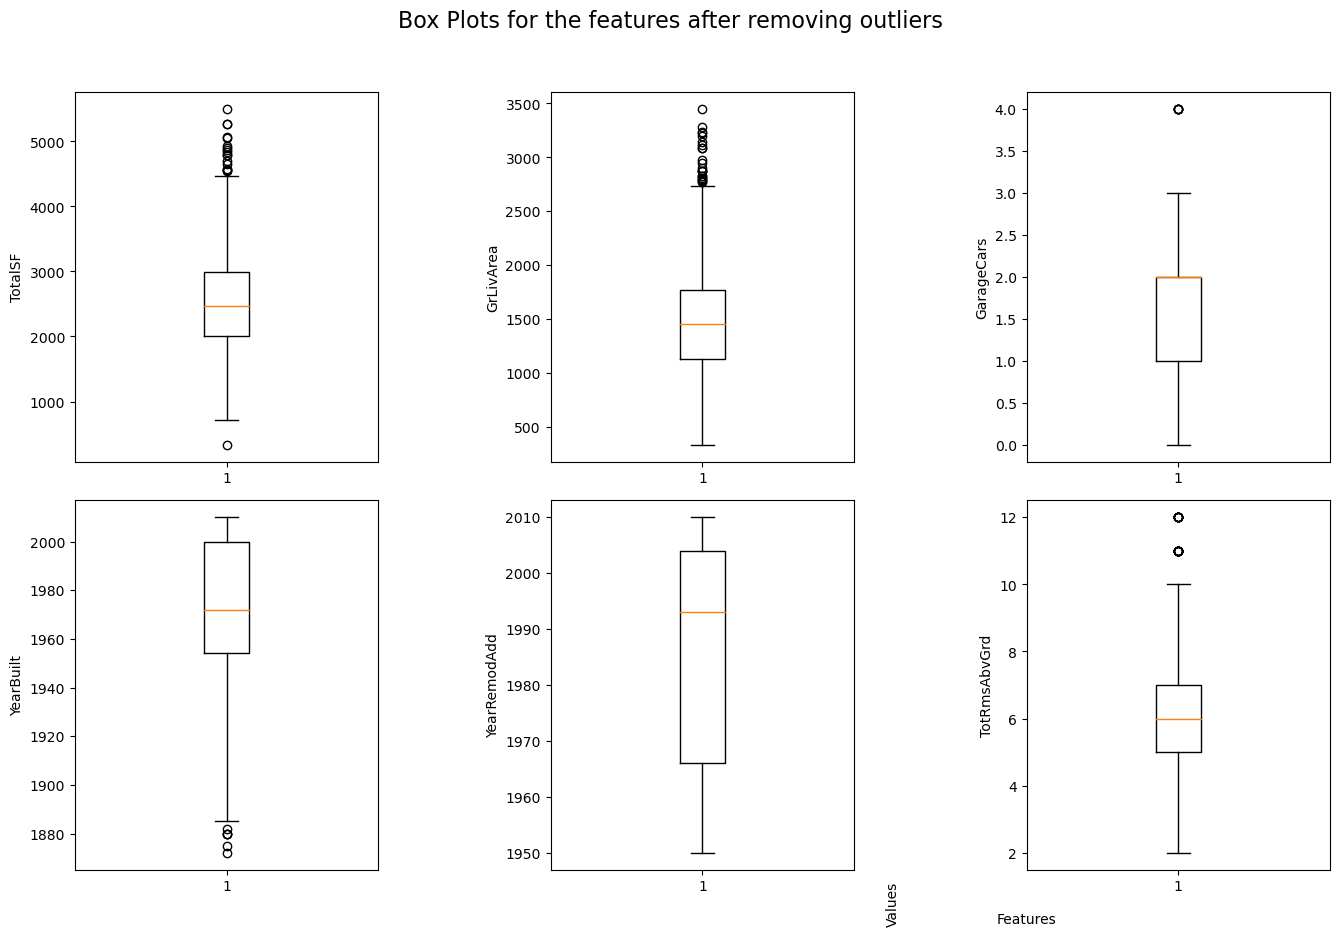

In [282]:
features = ["TotalSF", "GrLivArea", "GarageCars", "YearBuilt", "YearRemodAdd", "TotRmsAbvGrd"]

# Calculate the number of rows and columns needed for the subplots
num_plots = len(features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to make it easier to index
axes = axes.flatten()

# Loop through each feature and create a box plot
for i, feature in enumerate(features):
    # Create the box plot using Plotly Express
    fig = px.box(dataClean, y=feature)
    fig.update_layout(showlegend=False)  # Hide the legend for each plot
    box_data = fig['data'][0]  # Extract the box plot data
    box_values = box_data['y']  # Extract the y-values (box plot values)
    axes[i].boxplot(box_values)  # Plot the box plot on the corresponding subplot
    axes[i].set_ylabel(feature)  # Set y-label for each subplot

# Remove empty subplots if the number of features is not a multiple of the number of columns
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Set common x-label and title
plt.text(0.5, 0.04, 'Features', ha='center', va='center')
plt.text(0.06, 0.5, 'Values', ha='center', va='center', rotation='vertical')
plt.suptitle('Box Plots for the features after removing outliers', fontsize=16)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust layout to prevent overlap
plt.show()

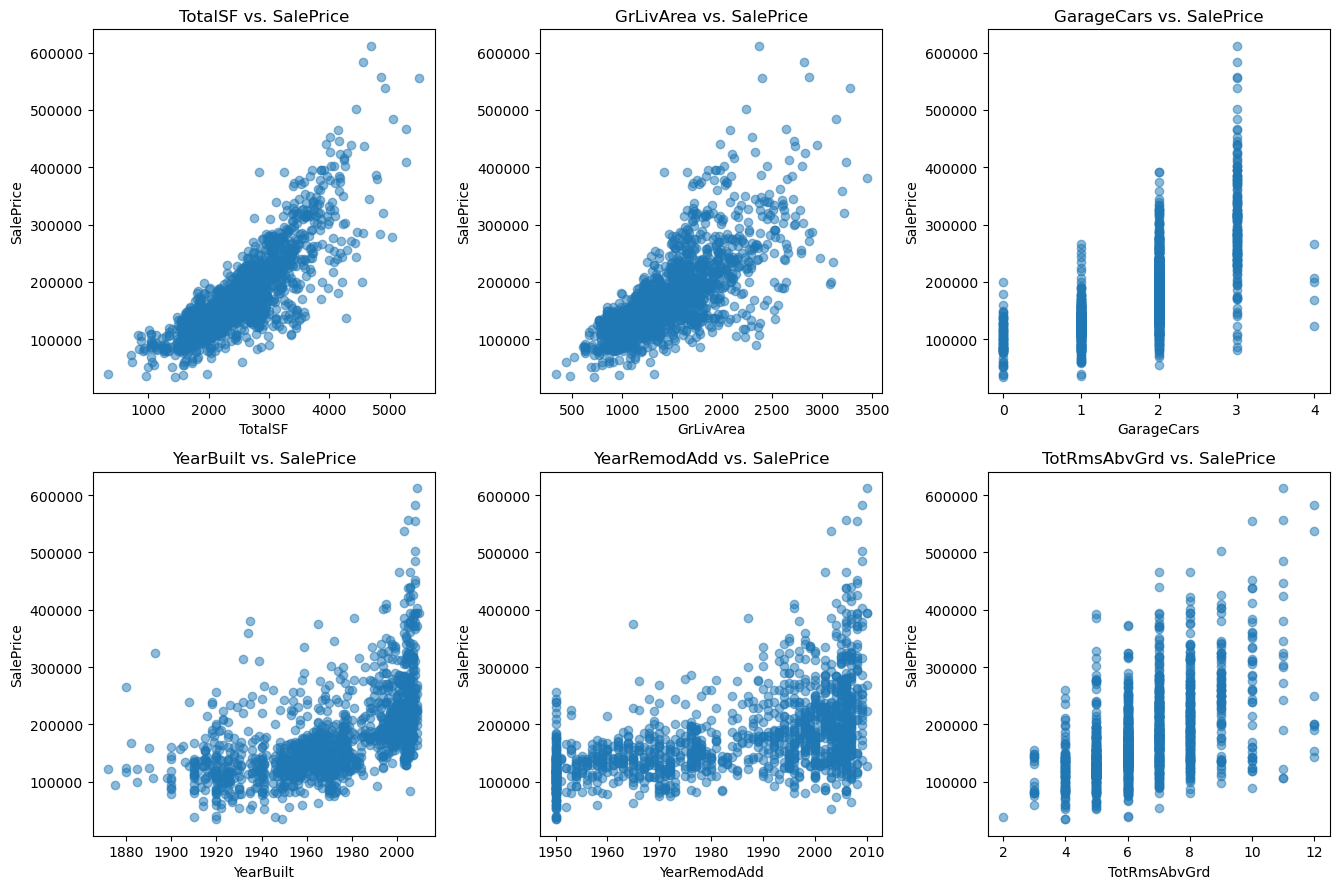

In [283]:
features = ["TotalSF", "GrLivArea", "GarageCars", "YearBuilt", "YearRemodAdd", "TotRmsAbvGrd"]
target_variable = "SalePrice"

# Calculate the number of rows and columns needed for the subplots
num_plots = len(features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to make it easier to index
axes = axes.flatten()

# Loop through each feature and create a scatterplot
for i, feature in enumerate(features):
    axes[i].scatter(dataClean[feature], dataClean[target_variable], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)
    axes[i].set_title(f"{feature} vs. {target_variable}")

# Remove empty subplots if the number of features is not a multiple of the number of columns
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust layout to prevent overlap
plt.show()

In [284]:
### EDA for categorical variables. 
#dataClean['OverallQual_Label']
categorical_data = dataClean.select_dtypes(include='object')

In [285]:
import pandas as pd
from scipy.stats import f_oneway

# Create an empty dictionary to store ANOVA results
anova_results = {}

# Iterate over each categorical variable
for column in categorical_data.columns:
    # Check if the variable has more than one unique value
    if len(dataClean[column].unique()) > 1:
        # Perform ANOVA analysis
        anova_result = f_oneway(*[dataClean[dataClean[column] == value]["SalePrice"] for value in dataClean[column].unique()])
        
        # Store ANOVA result in the dictionary
        anova_results[column] = anova_result

anova_data = []



# Iterate over each categorical variable and its ANOVA result
for column, result in anova_results.items():
    # Append ANOVA result to the list
    f_statistic_str = f"{result.statistic:.2f}"
    p_value_str = f"{result.pvalue:.4f}"
    
    f_statistic_int = float(f_statistic_str)
    p_value_int = float(p_value_str)
    
    anova_data.append({'Variable': column, 'F-statistic': f_statistic_int, 'p-value': p_value_int})

# Create a DataFrame from the list of ANOVA results
anova_df = pd.DataFrame(anova_data)

# Print the DataFrame
print(anova_df[anova_df['F-statistic'] < 100])

anova_df=anova_df[anova_df['F-statistic'] < 100]

         Variable  F-statistic  p-value
0      MSSubClass        35.49   0.0000
1        MSZoning        50.80   0.0000
2          Street         2.58   0.1084
3           Alley        16.02   0.0000
4        LotShape        37.73   0.0000
5     LandContour        14.92   0.0000
6       Utilities         0.31   0.5776
7       LotConfig         7.41   0.0000
8       LandSlope         2.59   0.0752
9    Neighborhood        77.80   0.0000
10     Condition1         7.36   0.0000
11     Condition2         2.81   0.0066
12       BldgType        13.83   0.0000
13     HouseStyle        19.30   0.0000
15    OverallCond        28.35   0.0000
16      RoofStyle        17.35   0.0000
17       RoofMatl         1.91   0.0760
18    Exterior1st        22.82   0.0000
19    Exterior2nd        19.81   0.0000
22      ExterCond        10.37   0.0000
25       BsmtCond        15.67   0.0000
26   BsmtExposure        75.25   0.0000
27   BsmtFinType1        71.98   0.0000
28   BsmtFinType2         2.43   0.0333


In [286]:
# Filter rows with p-value less than 0.05
significant_associations = anova_df[anova_df['p-value'] < 0.05].sort_values(by=['p-value', 'F-statistic'], ascending=[True, False])

# Display filtered results
print("Significant Associations (p-value < 0.05):")
print(significant_associations)

Significant Associations (p-value < 0.05):
         Variable  F-statistic  p-value
30      HeatingQC        91.78   0.0000
9    Neighborhood        77.80   0.0000
26   BsmtExposure        75.25   0.0000
27   BsmtFinType1        71.98   0.0000
36     GarageType        67.06   0.0000
45  SaleCondition        56.12   0.0000
1        MSZoning        50.80   0.0000
40     PavedDrive        45.53   0.0000
4        LotShape        37.73   0.0000
0      MSSubClass        35.49   0.0000
44       SaleType        34.61   0.0000
15    OverallCond        28.35   0.0000
32     Electrical        24.95   0.0000
18    Exterior1st        22.82   0.0000
19    Exterior2nd        19.81   0.0000
13     HouseStyle        19.30   0.0000
16      RoofStyle        17.35   0.0000
42          Fence        16.13   0.0000
3           Alley        16.02   0.0000
25       BsmtCond        15.67   0.0000
5     LandContour        14.92   0.0000
12       BldgType        13.83   0.0000
22      ExterCond        10.37   0.00

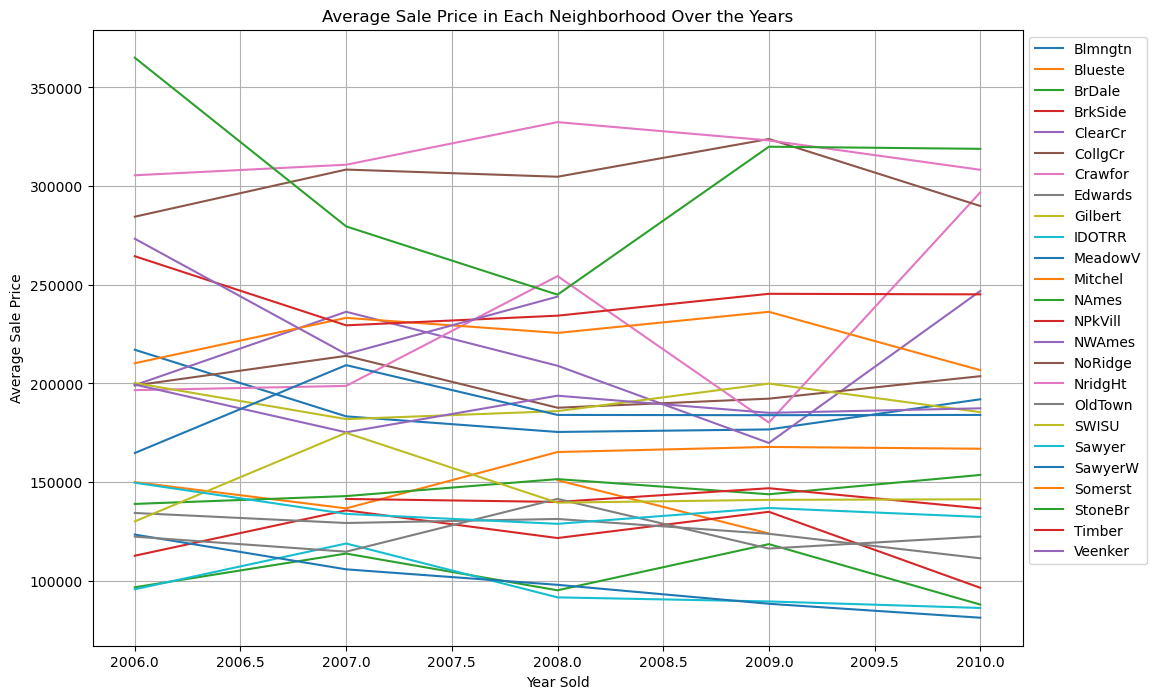

In [287]:
# Group data by 'Neighborhood' and 'YearBuilt', and calculate the average sale price
neighborhood_year_prices = dataClean.groupby(['Neighborhood', 'YrSold'])['SalePrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each neighborhood and plot its average sale price over the years
for neighborhood in neighborhood_year_prices['Neighborhood'].unique():
    neighborhood_data = neighborhood_year_prices[neighborhood_year_prices['Neighborhood'] == neighborhood]
    plt.plot(neighborhood_data['YrSold'], neighborhood_data['SalePrice'], label=neighborhood)

# Add labels and title
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price in Each Neighborhood Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid(True)

# Show plot
plt.show()

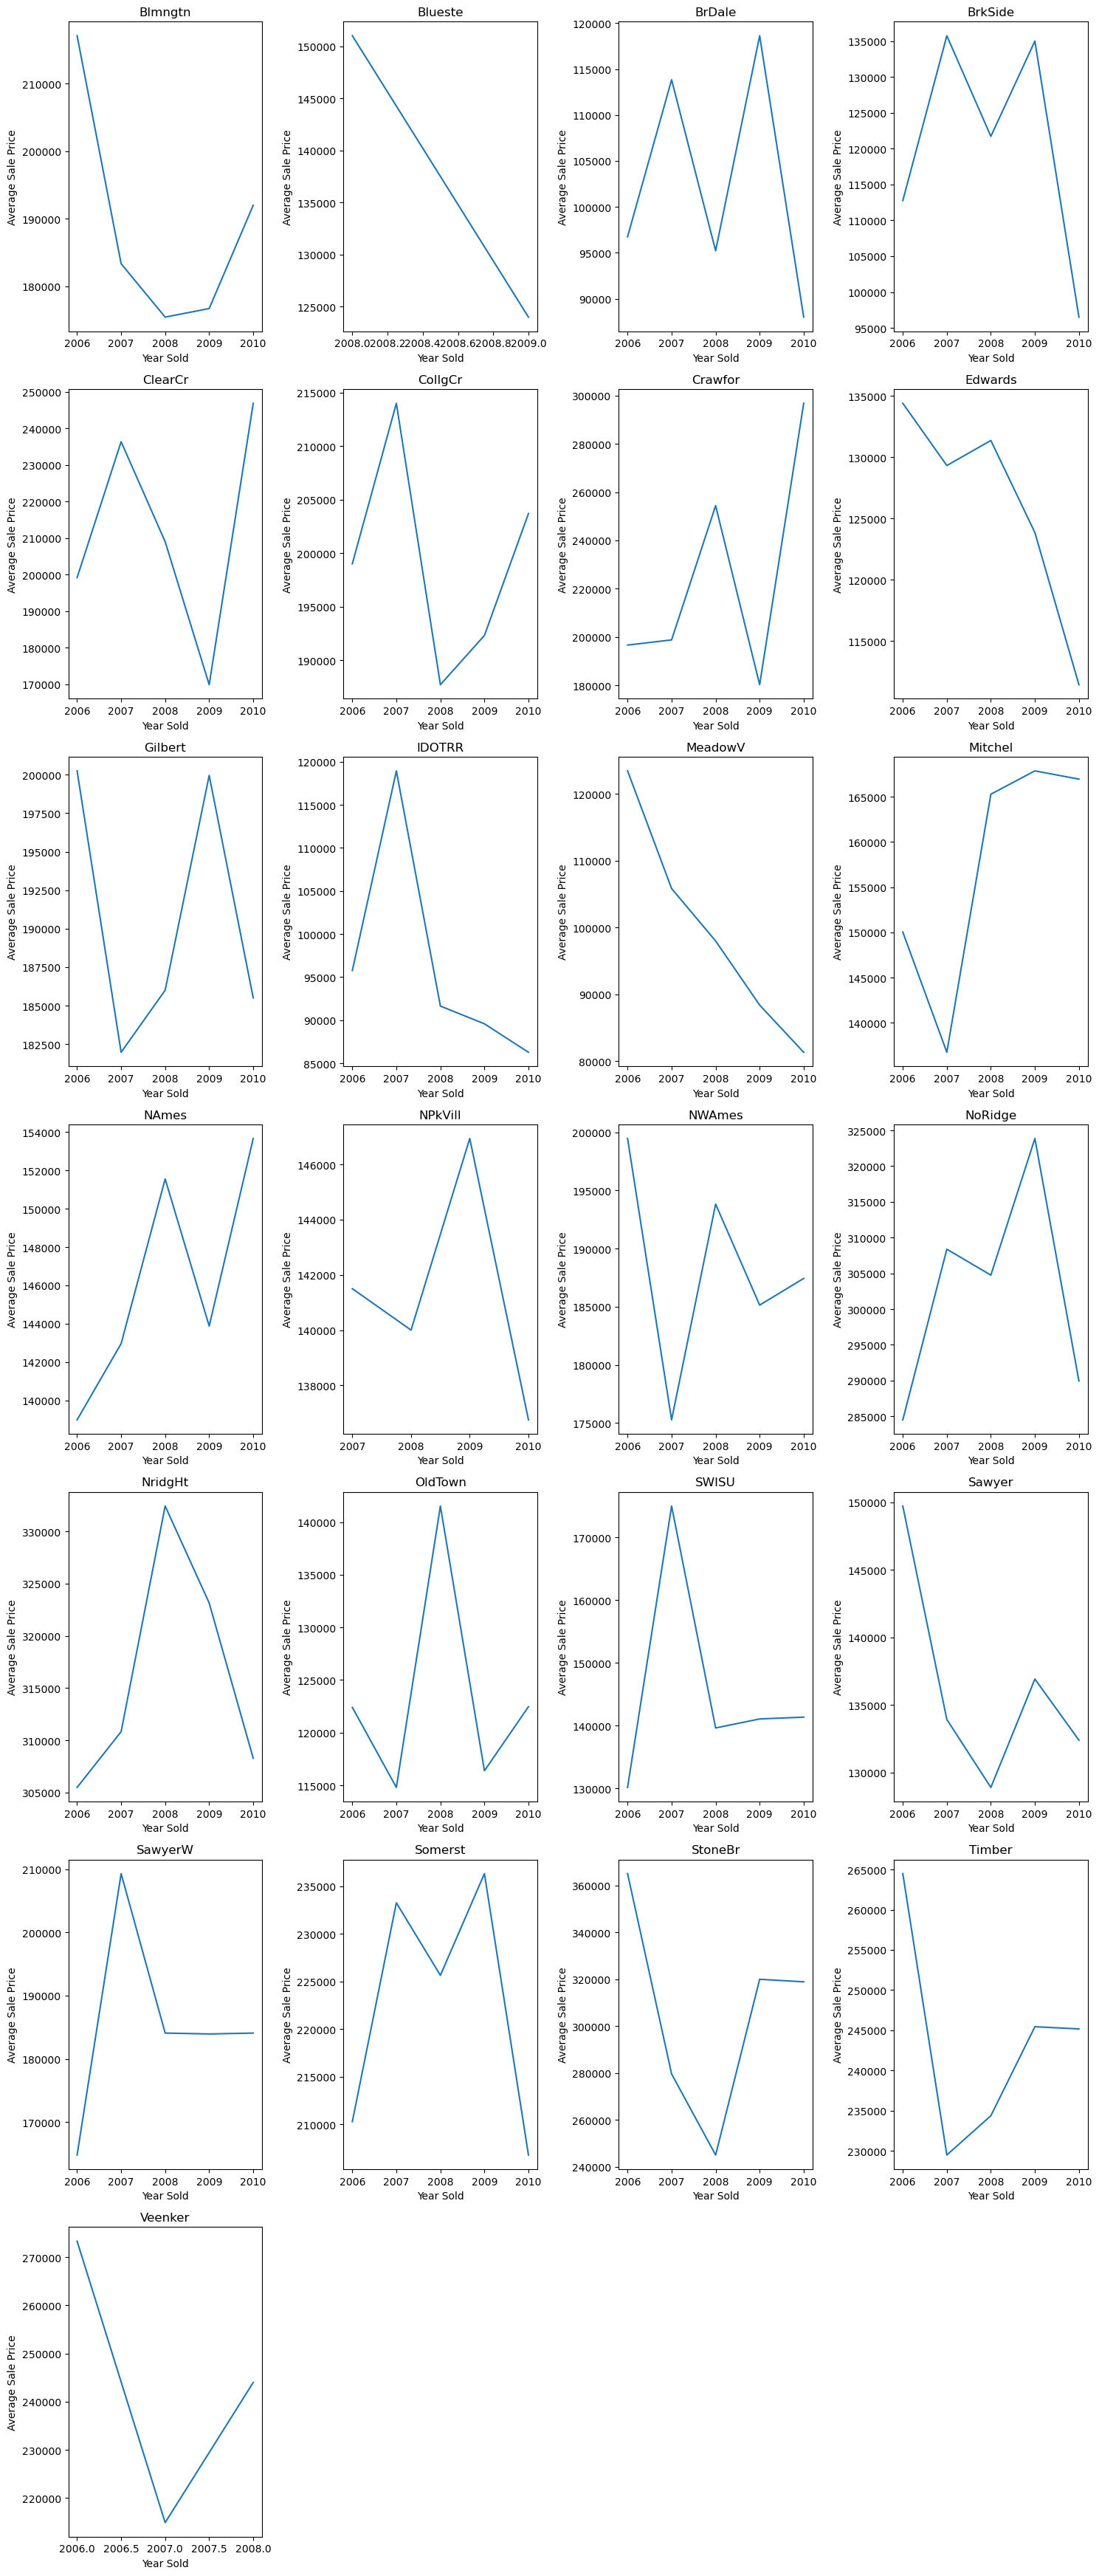

In [288]:
# Group data by 'Neighborhood' and 'YrSold', and calculate the average sale price
neighborhood_year_prices = dataClean.groupby(['Neighborhood', 'YrSold'])['SalePrice'].mean().reset_index()

# Get unique neighborhoods
neighborhoods = neighborhood_year_prices['Neighborhood'].unique()

# Calculate number of rows and columns for subplots
num_neighborhoods = len(neighborhoods)
num_cols = 4
num_rows = (num_neighborhoods + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array to facilitate indexing
axes = axes.flatten()

# Loop through each neighborhood and create a subplot
for i, neighborhood in enumerate(neighborhoods):
    neighborhood_data = neighborhood_year_prices[neighborhood_year_prices['Neighborhood'] == neighborhood]
    ax = axes[i]
    ax.plot(neighborhood_data['YrSold'], neighborhood_data['SalePrice'])
    ax.set_title(neighborhood)
    ax.set_xlabel('Year Sold')
    ax.set_ylabel('Average Sale Price')

# Hide empty subplots if the number of neighborhoods is not a multiple of the number of columns
for i in range(num_neighborhoods, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

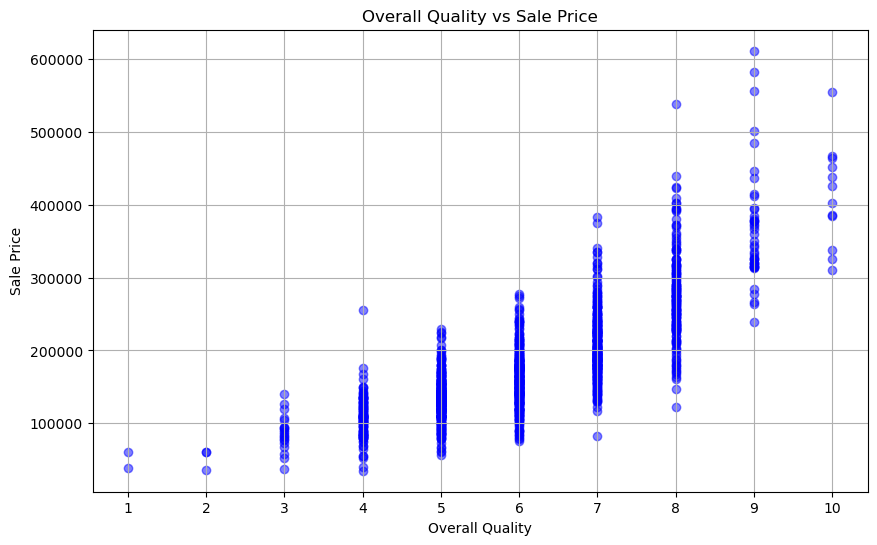

In [289]:
# Plotting the scatter plot
dummy = dataClean
dummy['OverallQual'] = pd.to_numeric(dummy['OverallQual'], errors='coerce')


plt.figure(figsize=(10, 6))
plt.scatter(dummy['OverallQual'], dummy['SalePrice'], alpha=0.5, color='blue')
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.xticks(range(1, 11))  # Setting x-axis ticks from 1 to 10
plt.grid(True)
plt.show()

In [290]:
dataClean['HeatingQC'].isnull().sum().sum()



0

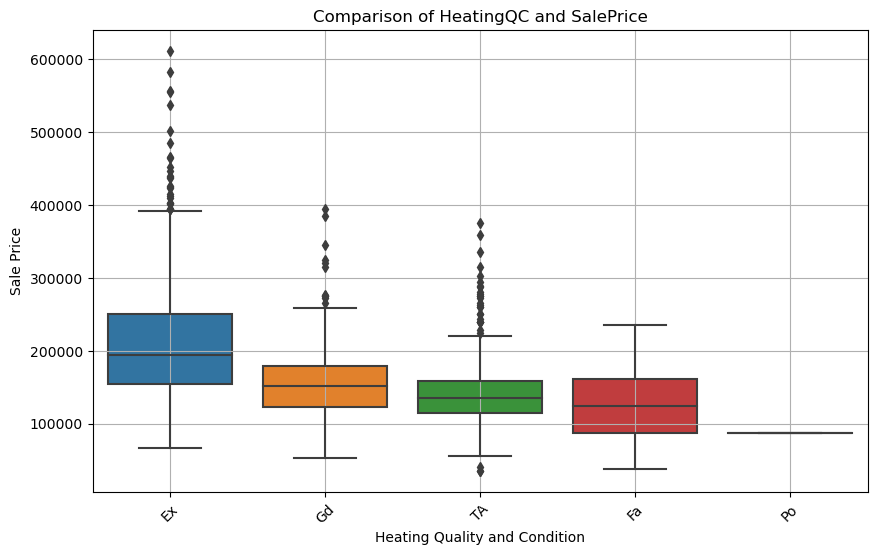

In [291]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeatingQC', y='SalePrice', data=dataClean)
plt.title('Comparison of HeatingQC and SalePrice')
plt.xlabel('Heating Quality and Condition')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

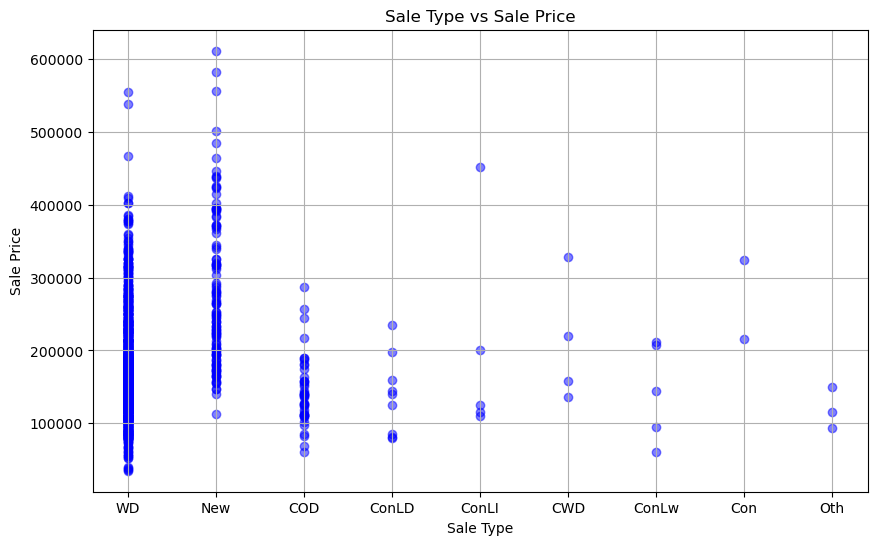

In [292]:
# Plotting the scatter plot
dummy = dataClean
#dummy['OverallQual'] = pd.to_numeric(dummy['OverallQual'], errors='coerce')


plt.figure(figsize=(10, 6))
plt.scatter(dummy['SaleType'], dummy['SalePrice'], alpha=0.5, color='blue')
plt.title('Sale Type vs Sale Price')
plt.xlabel('Sale Type')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

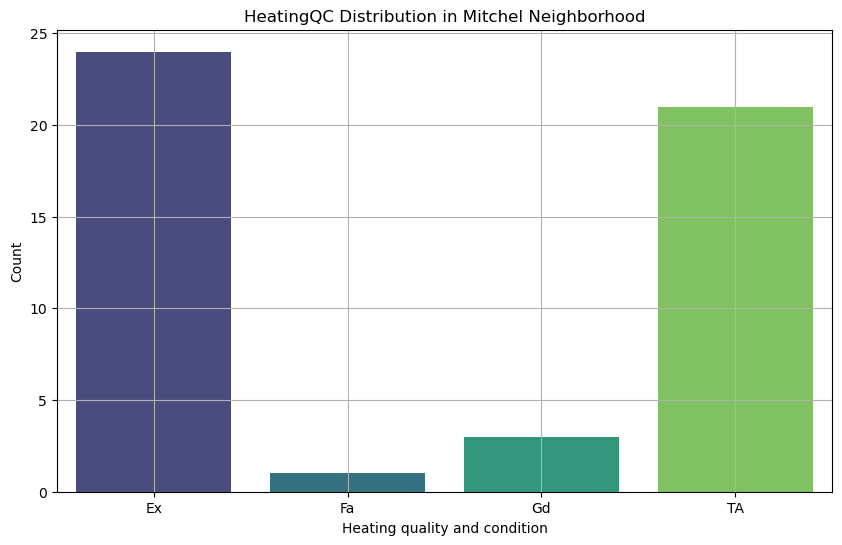

In [293]:
# Filter data for the "Mitchel" neighborhood
mitchel_data = dataClean[dataClean['Neighborhood'] == 'Mitchel']
#mitchel_data['HeatingQC'] = pd.to_numeric(mitchel_data['HeatingQC'], errors='coerce')

HeatingQC_order = sorted(edwards_data1['HeatingQC'].unique())

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='HeatingQC', data=mitchel_data, order=HeatingQC_order, palette='viridis')
plt.title('HeatingQC Distribution in Mitchel Neighborhood')
plt.xlabel('Heating quality and condition')
plt.ylabel('Count')
plt.grid(True)
plt.show()

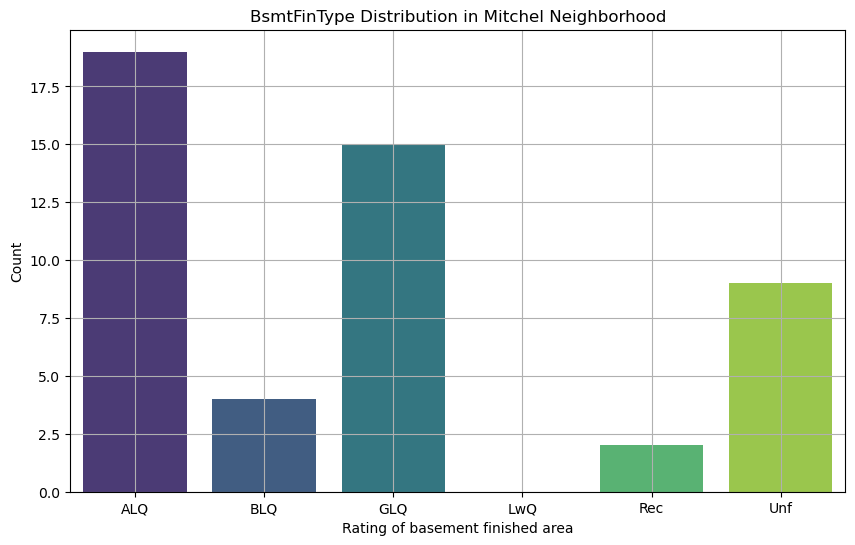

In [294]:

# Filter data for the "Mitchel" neighborhood
mitchel_data1 = dataClean[dataClean['Neighborhood'] == 'Mitchel']
#mitchel_data['HeatingQC'] = pd.to_numeric(mitchel_data['HeatingQC'], errors='coerce')

bsmt_fin_order = sorted(edwards_data1['BsmtFinType1'].unique())

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='BsmtFinType1', data=mitchel_data1, order=bsmt_fin_order, palette='viridis')
plt.title('BsmtFinType Distribution in Mitchel Neighborhood')
plt.xlabel('Rating of basement finished area')
plt.ylabel('Count')
plt.grid(True)
plt.show()

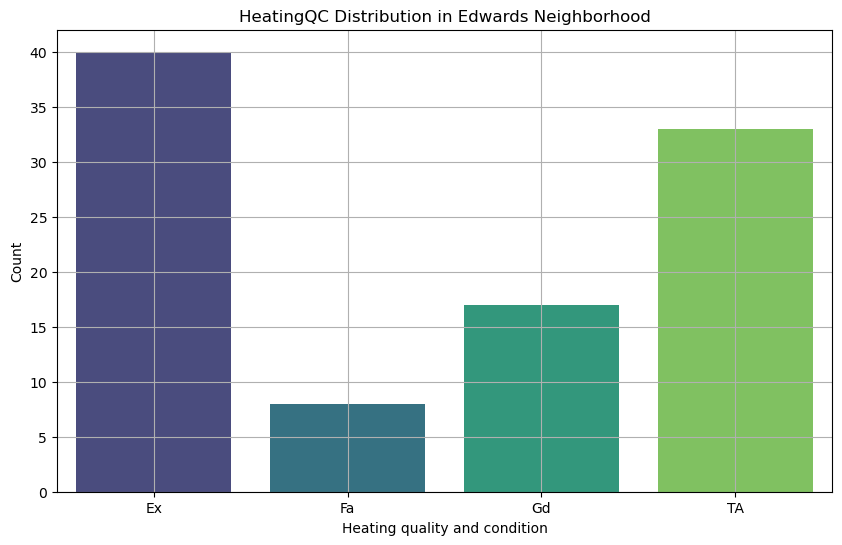

In [295]:
# Filter data for the "Mitchel" neighborhood
edwards_data = dataClean[dataClean['Neighborhood'] == 'Edwards']
#mitchel_data['HeatingQC'] = pd.to_numeric(mitchel_data['HeatingQC'], errors='coerce')

HeatingQC_order = sorted(edwards_data1['HeatingQC'].unique())

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='HeatingQC', data=edwards_data, order=HeatingQC_order, palette='viridis')
plt.title('HeatingQC Distribution in Edwards Neighborhood')
plt.xlabel('Heating quality and condition')
plt.ylabel('Count')
plt.grid(True)
plt.show()

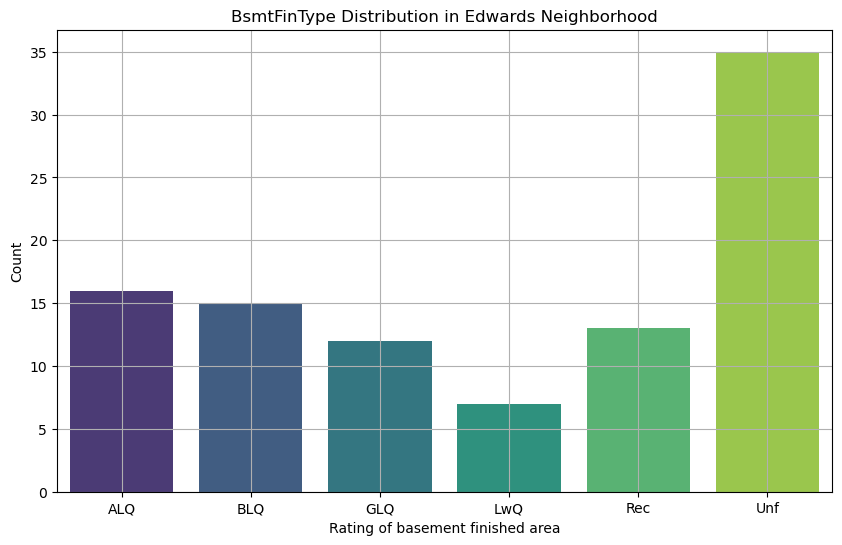

In [296]:

# Filter data for the "Mitchel" neighborhood
edwards_data1 = dataClean[dataClean['Neighborhood'] == 'Edwards']
#mitchel_data['HeatingQC'] = pd.to_numeric(mitchel_data['HeatingQC'], errors='coerce')


bsmt_fin_order = sorted(edwards_data1['BsmtFinType1'].unique())

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='BsmtFinType1', data=edwards_data1, order=bsmt_fin_order,  palette='viridis')
plt.title('BsmtFinType Distribution in Edwards Neighborhood')
plt.xlabel('Rating of basement finished area')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [297]:
dataClean["SalePrice"] = np.log1p(dataClean["SalePrice"])
dataClean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,12.247699,2566
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,12.109016,2524
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,12.317171,2706
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,11.849405,2473
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,12.429220,3343


In [300]:


dataCleanB = dataClean
dataClean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,12.247699,2566
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,12.109016,2524
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,12.317171,2706
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,11.849405,2473
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,12.429220,3343


# Model Building

In [301]:
from sklearn.model_selection import cross_validate, train_test_split


In [302]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
dataEncode= dataClean

In [303]:
columns_to_encode = dataEncode.select_dtypes(include=['object']).columns

# Dictionary to store LabelEncoders for each column
label_encoders = {}
# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    dataEncode[col] = le.fit_transform(dataEncode[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

In [304]:
dataEncode.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,9,3,65.0,8450,1,1,3,3,0,...,3,4,1,0,2,2008,8,4,12.247699,2566
1,2,4,3,80.0,9600,1,1,3,3,0,...,3,4,1,0,5,2007,8,4,12.109016,2524
2,3,9,3,68.0,11250,1,1,0,3,0,...,3,4,1,0,9,2008,8,4,12.317171,2706
3,4,10,3,60.0,9550,1,1,0,3,0,...,3,4,1,0,2,2006,8,0,11.849405,2473
4,5,9,3,84.0,14260,1,1,0,3,0,...,3,4,1,0,12,2008,8,4,12.429220,3343


In [307]:

X = dataEncode.drop(columns=['Id', 'SalePrice'])  # Drop 'Id' and 'SalePrice' columns to get features
y = dataEncode['SalePrice'] 

# Identify categorical columns
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,9,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,2566
1,4,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,2524
2,9,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,2706
3,10,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,2473
4,9,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,3343


In [322]:
X_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,9,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,2566
1,4,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,2524
2,9,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,2706
3,10,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,2473
4,9,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,3343


In [323]:
#mutual information
from sklearn.feature_selection import mutual_info_regression

# Perform feature selection using mutual information
num_features_to_select = 10  # Number of features you want to select
selector = SelectKBest(score_func=mutual_info_regression, k=num_features_to_select)
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_encoded.columns[selected_feature_indices]

# Print selected feature names
print("Selected Features:")
print(sorted(selected_feature_names))
mutualSelected = X_encoded[selected_feature_names]
mutualSelected.head()

Selected Features:
['ExterQual', 'GarageArea', 'GarageCars', 'GrLivArea', 'KitchenQual', 'Neighborhood', 'OverallQual', 'TotalBsmtSF', 'TotalSF', 'YearBuilt']


,Neighborhood,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,GrLivArea,KitchenQual,GarageCars,GarageArea,TotalSF
0,5,7,2003,2,856,1710,2,2,548,2566
1,24,6,1976,3,1262,1262,3,2,460,2524
2,5,7,2001,2,920,1786,2,2,608,2706
3,6,7,1915,3,756,1717,2,3,642,2473
4,15,8,2000,2,1145,2198,2,3,836,3343


In [324]:
# Wrapper select
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # You can replace this with any estimator of your choice

# Initialize your estimator (model)
estimator = LinearRegression()  # You can replace this with any estimator of your choice

# Initialize RFE with the estimator and desired number of features to select
num_features_to_select = 10  # Number of features you want to select
selector = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE to your data
selector.fit(X_encoded, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_encoded.columns[selected_feature_indices]

# Print selected feature names
print("Selected Features:")
print(sorted(selected_feature_names))
wrapSelected = X_encoded[selected_feature_names]
wrapSelected.head()

Selected Features:
['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'GrLivArea', 'LowQualFinSF', 'TotalBsmtSF', 'TotalSF']


,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotalSF
0,706,0,150,856,1,856,854,0,1710,2566
1,978,0,284,1262,1,1262,0,0,1262,2524
2,486,0,434,920,1,920,866,0,1786,2706
3,216,0,540,756,1,961,756,0,1717,2473
4,655,0,490,1145,1,1145,1053,0,2198,3343


In [325]:
#Univariate feature selection
from sklearn.feature_selection import SelectKBest, f_regression  # You can replace f_regression with any other suitable scoring function

# Initialize SelectKBest with the desired scoring function and number of features to select
num_features_to_select = 10  # Number of features you want to select
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit SelectKBest to your data
selector.fit(X_encoded, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_encoded.columns[selected_feature_indices]

# Print selected feature names
print("Selected Features:")
print(sorted(selected_feature_names))
uniVarSelected = X_encoded[selected_feature_names]
uniVarSelected.head()

Selected Features:
['1stFlrSF', 'ExterQual', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'TotalSF', 'YearBuilt']


,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotalSF
0,7,2003,2,856,856,1710,2,2,548,2566
1,6,1976,3,1262,1262,1262,2,2,460,2524
2,7,2001,2,920,920,1786,2,2,608,2706
3,7,1915,3,756,961,1717,1,3,642,2473
4,8,2000,2,1145,1145,2198,2,3,836,3343


In [333]:
#My selectied features
mySelection = ['TotalSF', 'GrLivArea', 'GarageCars', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'HeatingQC', 'Neighborhood', 'BsmtFinType1']
mySelected = X_encoded[mySelection]
mySelected.head()

,TotalSF,GrLivArea,GarageCars,YearBuilt,YearRemodAdd,TotRmsAbvGrd,HeatingQC,Neighborhood,BsmtFinType1
0,2566,1710,2,2003,2003,8,0,5,2
1,2524,1262,2,1976,1976,6,0,24,0
2,2706,1786,2,2001,2002,6,0,5,2
3,2473,1717,3,1915,1970,7,2,6,0
4,3343,2198,3,2000,2000,9,0,15,2


In [314]:
print(X.shape)
print(y.shape)


(1451, 80)
(1451,)


In [245]:
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

print("data_train",data_train.shape)
print("data_test",data_test.shape)
print("target_train",target_train.shape)
print("target_test",target_test.shape)

data_train (1015, 80)
data_test (436, 80)
target_train (1015,)
target_test (436,)


In [246]:
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 



#SciKit Gradient Boosting - Cross Val
start_ts=time.time()
rgr=GradientBoostingRegressor(n_estimators=100, loss='squared_error',learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=1).fit(data_train, target_train)
scores=cross_validate(rgr, X, y, scoring=scorers, cv=5)                                                                                                    

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Gradient Boosting RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Gradient Boosting RMSE:: 0.12 (+/- 0.01)
Gradient Boosting Expl Var: 0.90 (+/- 0.02)
CV Runtime: 2.380436897277832


## Decision Tree

In [345]:
# Define the decision tree regressor with your chosen parameters
data_train, data_test, target_train, target_test = train_test_split(uniVarSelected, y, test_size=0.3)

from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=5, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=42).fit(data_train, target_train)
#
# Perform cross-validationpoisson
start_time = time.time()
scorers = {'RMSE': 'neg_mean_squared_error', 'Expl_Var': 'explained_variance'}
scores = cross_validate(dt_regressor, X, y, scoring=scorers, cv=5)

# Extract RMSE and Expl Var scores
rmse_scores = np.sqrt(-scores['test_RMSE'])
exp_var_scores = scores['test_Expl_Var']

# Calculate mean and standard deviation
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_exp_var = np.mean(exp_var_scores)
std_exp_var = np.std(exp_var_scores)

# Print results
print("Decision Tree RMSE: {:.2f} (+/- {:.2f})".format(mean_rmse, std_rmse))
print("Decision Tree Expl Var: {:.2f} (+/- {:.2f})".format(mean_exp_var, std_exp_var))
print("CV Runtime:", time.time() - start_time)

Decision Tree RMSE: 0.19 (+/- 0.01)
Decision Tree Expl Var: 0.77 (+/- 0.01)
CV Runtime: 0.06074213981628418


In [362]:
## Gradient boosting results like grid search 
from sklearn.model_selection import cross_val_score

data_train, data_test, target_train, target_test = train_test_split(mySelected, y, test_size=0.3)


# Define the gradient boosting regressor with the best parameters
rgr = GradientBoostingRegressor(n_estimators=100, loss='squared_error',learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=1).fit(data_train, target_train)

# Perform cross-validation
start_time = time.time()
scores = cross_validate(rgr, X, y, scoring=['neg_mean_squared_error', 'explained_variance'], cv=5)

# Extract RMSE and explained variance scores
rmse_scores = np.sqrt(-scores['test_neg_mean_squared_error'])
exp_var_scores = scores['test_explained_variance']

# Calculate mean and standard deviation
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_exp_var = np.mean(exp_var_scores)
std_exp_var = np.std(exp_var_scores)

# Print results
print("Gradient Boosting RMSE:: {:.2f} (+/- {:.2f})".format(mean_rmse, std_rmse))
print("Gradient Boosting Expl Var: {:.2f} (+/- {:.2f})".format(mean_exp_var, std_exp_var))
print("CV Runtime:", time.time() - start_time)

Gradient Boosting RMSE:: 0.12 (+/- 0.01)
Gradient Boosting Expl Var: 0.90 (+/- 0.01)
CV Runtime: 2.048631191253662


#### n_estimators- The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

In [130]:
import xgboost as xgb
start_ts=time.time()
model=xgb.XGBRegressor(n_estimators = 500,learning_rate = 0.1, max_depth= 3, random_state=1)
model.fit(data_train, target_train)
scores=cross_validate(model, X, y, scoring=scorers, cv=5)                                                                                                    


scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Gradient Boosting RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Gradient Boosting RMSE:: 0.17 (+/- 0.02)
Gradient Boosting Expl Var: 0.81 (+/- 0.02)
CV Runtime: 1.101599931716919


In [131]:
# Define the parameter grid to search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'loss':['squared_error','absolute_error', 'quantile', 'huber'],
    'random_state':[42]
    
}
2
# Instantiate GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(data_train, target_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
target_pred = best_model.predict(data_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(target_test, target_pred, squared=False)
print("Best Parameters:", best_params)
print("Best RMSE:", rmse)


# Calculate explained variance score
exp_var_score = explained_variance_score(target_test, target_pred)
print("Explained Variance Score:", exp_var_score)

Best Parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 42}
Best RMSE: 0.15791531187987398
Explained Variance Score: 0.831716765753901


In [328]:
# Define the parameter grid to search
data_train, data_test, target_train, target_test = train_test_split(wrapSelected, y, test_size=0.3)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotalSF
1418,25,872,247,1144,1,1144,0,0,1144,2288
368,540,0,728,1268,1,1268,0,0,1268,2536
1236,0,0,764,764,1,764,862,0,1626,2390
401,24,0,1286,1310,1,1310,0,0,1310,2620
1268,192,0,536,728,1,1968,1479,0,3447,4175
...,...,...,...,...,...,...,...,...,...,...
462,553,311,0,864,1,864,0,0,864,1728
779,975,0,0,975,1,1004,0,0,1004,1979
936,833,0,343,1176,1,1200,0,0,1200,2376
139,821,0,107,928,1,928,836,0,1764,2692


In [329]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'loss': ['squared_error', 'absolute_error', 'quantile', 'huber'],
    'random_state': [42]
}

## error - not working

# Instantiate GradientBoostin
gRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(data_train, target_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
target_pred = best_model.predict(data_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(target_test, target_pred, squared=False)

# Calculate explained variance score
exp_var_score = explained_variance_score(target_test, target_pred)

# Calculate mean and standard deviation for the scores
rmse_mean = np.mean(grid_search.cv_results_['mean_test_score'])
rmse_std = np.std(grid_search.cv_results_['std_test_score'])
exp_var_mean = np.mean(grid_search.cv_results_['mean_test_explained_variance'])
exp_var_std = np.std(grid_search.cv_results_['std_test_explained_variance'])

# Print results in the desired format
print("Gradient Boosting RMSE:: {:.2f} (+/- {:.2f})".format(rmse_mean, rmse_std))
print("Gradient Boosting Expl Var: {:.2f} (+/- {:.2f})".format(exp_var_mean, exp_var_std))
print("Best Parameters:", best_params)
print("Best RMSE:", rmse)
print("Explained Variance Score:", exp_var_score)

KeyError: 'mean_test_explained_variance'

In [363]:
from sklearn.metrics import make_scorer, explained_variance_score

data_train, data_test, target_train, target_test = train_test_split(wrapSelected, y, test_size=0.3)

# Define the scoring function for explained variance score
scoring = {
    'Neg_MSE': 'neg_mean_squared_error', 
    'Expl_Var': make_scorer(explained_variance_score)
}

# Instantiate GridSearchCV with the updated scoring parameter
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring=scoring, refit='Neg_MSE')

# Fit the grid search to the data
grid_search.fit(data_train, target_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
target_pred = best_model.predict(data_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(target_test, target_pred, squared=False)

# Extract mean and standard deviation for the scores
results = grid_search.cv_results_
rmse_mean = np.mean(results['mean_test_Neg_MSE'])
rmse_std = np.std(results['std_test_Neg_MSE'])
exp_var_mean = np.mean(results['mean_test_Expl_Var'])
exp_var_std = np.std(results['std_test_Expl_Var'])

# Print results in the desired format
print("Gradient Boosting RMSE: {:.2f} (+/- {:.2f})".format(rmse_mean, rmse_std))
print("Gradient Boosting Expl Var: {:.2f} (+/- {:.2f})".format(exp_var_mean, exp_var_std))
print("Best Parameters:", best_params)
print("Best RMSE:", rmse)


Gradient Boosting RMSE: -0.05 (+/- 0.00)
Gradient Boosting Expl Var: 0.74 (+/- 0.01)
Best Parameters: {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 200, 'random_state': 42}
Best RMSE: 0.19891352163639275


In [ ]:
estimator = RandomForestRegressor(random_state=42)

# Instantiate RFE with the chosen estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=5)  # Select 5 features

# Fit RFE to the training data
rfe.fit(data_train, target_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Transform the data to contain only the selected features
X_train_selected = rfe.transform(data_train)
X_test_selected = rfe.transform(data_test)

# Train a model using only the selected features
estimator.fit(X_train_selected, target_train)

# Predict on the test set using the model trained with selected features
target_pred = estimator.predict(X_test_selected)

# Evaluate the performance of the model
rmse = mean_squared_error(target_test, target_pred, squared=False)
print("RMSE with selected features:", rmse)

In [357]:
# Define the decision tree regressor with your chosen parameters
data_train, data_test, target_train, target_test = train_test_split(mySelected, y, test_size=0.3)

from sklearn.tree import DecisionTreeRegressor
dt_regressor = RandomForestRegressor(n_estimators=100, max_features=.33, max_depth=None, min_samples_split=3, random_state=1)
#
# Perform cross-validationpoisson
start_time = time.time()
scorers = {'RMSE': 'neg_mean_squared_error', 'Expl_Var': 'explained_variance'}
scores = cross_validate(dt_regressor, X, y, scoring=scorers, cv=5)

# Extract RMSE and Expl Var scores
rmse_scores = np.sqrt(-scores['test_RMSE'])
exp_var_scores = scores['test_Expl_Var']

# Calculate mean and standard deviation
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_exp_var = np.mean(exp_var_scores)
std_exp_var = np.std(exp_var_scores)

# Print results
print("Decision Tree RMSE: {:.2f} (+/- {:.2f})".format(mean_rmse, std_rmse))
print("Decision Tree Expl Var: {:.2f} (+/- {:.2f})".format(mean_exp_var, std_exp_var))
print("CV Runtime:", time.time() - start_time)

Decision Tree RMSE: 0.13 (+/- 0.00)
Decision Tree Expl Var: 0.89 (+/- 0.01)
CV Runtime: 1.9304602146148682


In [352]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
636,5,4,51.0,6120,1,1,3,3,0,4,...,0,3,4,1,0,1,2009,5,4,1064
1101,4,3,61.0,9758,1,1,0,3,0,4,...,0,3,4,1,0,7,2007,8,4,1900
581,4,3,98.0,12704,1,1,3,3,0,4,...,0,3,4,1,0,8,2009,6,5,4084
716,10,4,60.0,10800,1,0,3,0,0,4,...,0,3,4,1,0,7,2007,8,4,3272
139,9,3,65.0,15426,1,1,0,3,0,4,...,0,3,2,1,0,8,2009,8,4,2692


In [ ]:
import nltk
import re
import string
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import h2o
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from math import radians, sin, cos, sqrt, atan2
from shapely.geometry import Polygon
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# from evalml.automl import AutoMLSearch
# from pycaret.classification import setup, compare_models, predict_model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from statsmodels.tools.tools import add_constant

# from evalml.objectives import get_optimization_objectives
# from evalml.problem_types import ProblemTypes

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from h2o.automl import H2OAutoML
from tpot import TPOTClassifier

nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')